# Import Datasets
This Jupyter notebook imports the Beta and Temple University datasets. Instructions on how to download each dataset are included in the [01_Readme.md](#../01_README.md) file

**Note:** The directories of the datasets must be changed according to your folder configuration. 


In [23]:
# Import packages
import os
import numpy as np
import matplotlib.pyplot as plt
from Functions import file_converters

%matplotlib inline

absolute_path = os.getcwd()

# Settings - Change according to your needs
# - Paths
beta_path = 'Data\\BETA Dataset'            # Relative path for BETA dataset
temple_path = 'Data\\Temple artifact data'  # Relative path for Temple dataset

# - Save data
save_beta = False   # Boolean to save data to .npz file
save_temple = True # Boolean to save data to .npz file

# - Trials to import. Select trials as a list of strings
# beta_trials = ['S1', 'S2', 'S3']        
beta_trials = ['S1']        
temple_trials = ['00000630_s002_t001', '00001355_s003_t000', '00000254_s007_t000']  # List of trials [.edf file type]
temple_labels = ['labels_01_tcp_ar']    # List of labels [.csv file type]

plot_imported = True   # Boolean to plot the imported data

## Beta Dataset
First, we will import the trials from the [BETA dataset](http://bci.med.tsinghua.edu.cn/download.html). The files are imported from a `.mat` and converted to a `.npz` file type.

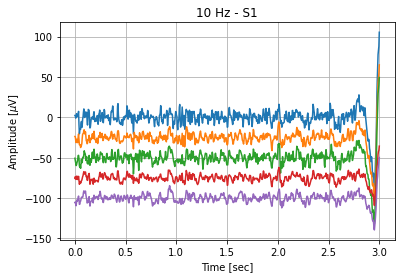

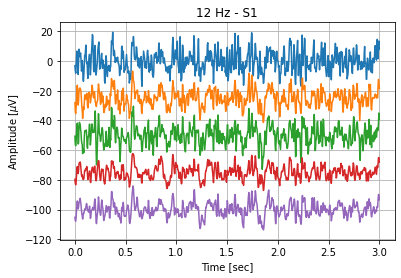

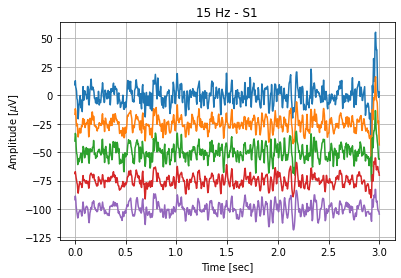

In [24]:
# Initialize list to store data
beta_data = [None]*len(beta_trials)

# Import data from trials chosen
for i, trial in enumerate(beta_trials):
    temp_trial = os.path.join(absolute_path, beta_path, trial)
    beta_data[i] = file_converters.mat_to_npz(temp_trial, save_file=save_beta, save_name=trial, )

    if plot_imported:
        nchannels = 5  # Number of channels to plot
        for j, f in enumerate([10, 12, 15]):
            temp_data = beta_data[i][0][:,0:nchannels,j] # Temp variable to plot data
            srate = beta_data[i][1] # Sampling rate [Hz]
            temp_time = np.linspace(0, np.size(temp_data,0)/srate, np.size(temp_data,0))
            fig, ax = plt.subplots()
            ax.plot(temp_time, temp_data*1e6 - np.linspace(0,nchannels*20,nchannels))
            ax.set_title(f'{f} Hz - {trial}')
            ax.set_xlabel('Time [sec]')
            ax.set_ylabel('Amplitude [$\mu$V]')
            ax.grid()

## Temple University Dataset
Second, we will import the eye movement and muscle artifacts from the [Temple University database](https://isip.piconepress.com/projects/tuh_eeg/html/downloads.shtml#i_rsyn). The files are imported from a `.edf` and converted to a `.npz` file type.

Extracting EDF parameters from c:\Users\danie\OneDrive - University of Calgary\PDF\Proyects\SSVEP_ART\Data\Temple artifact data\00000630_s002_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\danie\OneDrive - University of Calgary\PDF\Proyects\SSVEP_ART\Data\Temple artifact data\00001355_s003_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from c:\Users\danie\OneDrive - University of Calgary\PDF\Proyects\SSVEP_ART\Data\Temple artifact data\00000254_s007_t000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


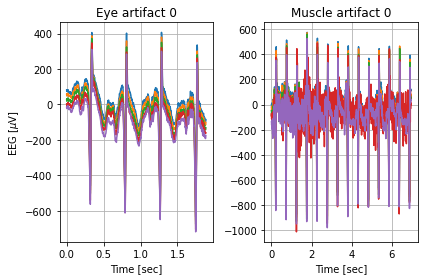

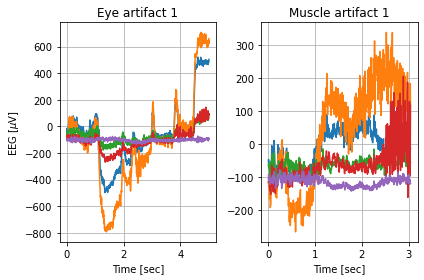

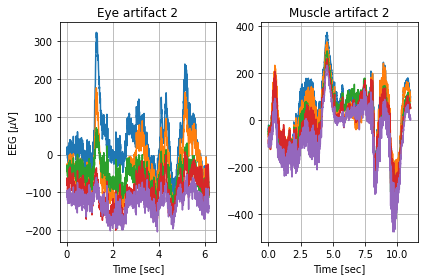

In [26]:
# Initialize list to store data
temple_data = [None]*len(temple_trials)

# Import data from trials chosen
for i, trial in enumerate(temple_trials):
    temp_trial = os.path.join(absolute_path, temple_path, trial)
    temp_label = os.path.join(absolute_path, temple_path, temple_labels[0])
    temple_data[i] = file_converters.edf_to_npz(temp_trial, temp_label, save_file=save_temple, \
        save_name=trial, resample=False)

if plot_imported:
    n_channels = 5  # Number of channels to plot
    n_artifacts = 1 # Number of artifacts to plot
    for i, trial in enumerate(temple_data):
        for j in range(n_artifacts):
            # Eye movement artifact data
            eye_data = trial[0][j][:,0:n_channels] # EEG eye artifact data [V]
            artifact_srate = trial[2]           # Sampling rate [Hz]
            eye_time = np.linspace(0, len(eye_data)/artifact_srate, len(eye_data))

            # Muscle artifact data
            mus_data = trial[1][j][:,0:n_channels]
            mus_time = np.linspace(0, len(mus_data)/artifact_srate, len(mus_data))

            fig, ax = plt.subplots(1,2)
            ax[0].plot(eye_time, eye_data*1e6 - np.linspace(0, n_channels*20, n_channels))
            ax[0].set_title(f'Eye artifact {i}')
            ax[0].set_xlabel('Time [sec]')
            ax[0].set_ylabel('EEG [$\mu$V]')
            ax[0].grid()

            ax[1].plot(mus_time, mus_data*1e6 - np.linspace(0, n_channels*20, n_channels))
            ax[1].set_title(f'Muscle artifact {i}')
            ax[1].set_xlabel('Time [sec]')
            ax[1].grid()

            fig.tight_layout()

# Next steps
After the data is imported and saved to the `.npz` files, run the [03_Conv_EEG.ipynb](03_Convolve_EEG.ipynb) to convolve the clean (BETA dataset) and artifact (Temple University) data. 

The convolved dataset can then be used to test multiple manual and automated artifact removal tools.